# Python 例3: 使用PyTorch求解RTE(和Matlab代码对比)


```matlab
% it solves the multiscale heat transfer based on the phonon Boltzmann transport equation
% by using the synthetic iteration scheme
% the BTE are given by Phys. Rev. E 96 (2017) 063311, but the macroscopic
% acceleration equation is different. In fact, our macroscopic equation is
% derived exactly from the BTE

% Initial condition
a = 1;
c = 1;
rho = 1;
cv = 1;

fileIDI0 = fopen('I0.txt', 'w');
fileIDT = fopen('T.txt','w');
% ini = sin(2 * pi * x)

% spatial grid
N=400;
L = 1;
dx = L / N;
x = 0.5 * dx : dx : L - 0.5 * dx;
Tini = 0.1 * sin(2 * pi * x) + 1;
sigma = 1; 
CFL = 0.8;
dt=CFL*dx; % time step
dtc = dt * c;
ddtc = 1/ dtc;

% velocity grid & angle
Nvx=8;
[mu, wmu] = Get_Gauss_Point(Nvx);

% distribution function

T = Tini;
I = zeros(Nvx, N + 2);
I(:, 2:end-1) = repmat(0.5 * a * c * Tini.^4, Nvx, 1);
I(:,1)=I(:, end-1); I(:,end)=I(:,2); % boundary condition

I0 =  wmu' * I; % energe

%% main iteration

for loop=1: 1/dt
    I_out = I;
    T_out = T;
    I0_out = I0;

    %% streaming, positive vx
    lv=Nvx/2+1:Nvx;coe = mu(lv); index = 2:N + 1;
    I(lv, index) = I_out(lv, index) ...
        - dt / dx * coe .* (I_out(lv, index) - I_out(lv, index -1))...
        +  dt * sigma * (0.5*a*c * repmat(T_out.^4, Nvx/2, 1) - I_out(lv, index));

    %% streaming, negative vx
    lv=1:Nvx/2; coe= mu(lv);
    I(lv,index)= I_out(lv, index) ...
        -dt / dx * coe .* (I_out(lv, index+1) - I_out(lv, index))...
        +  dt * sigma * (0.5*a*c * repmat(T_out.^4, Nvx/2,1) - I_out(lv, index));

    %% macroscopic quantities

    I(:,end)= I(:, 2); I(:,1)= I(:, end-1);

    T = T_out + dt / cv * sigma .* (I0_out(index) - a  * c * T_out.^4);
    I0 =  wmu' * I;

    loop
    fprintf(fileIDI0, '%12.8f',I0(2:end-1));
    fprintf(fileIDT, '%12.8f',T);
    fprintf(fileIDT, '\n');
    fprintf(fileIDI0, '\n');
end
fclose(fileIDI0);
fclose(fileIDT);
```

In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## 使用Numpy操作张量

In [10]:
x=np.linspace(0,1,100)
a=2
b=3
noise=0.1*np.random.randn(100)
y=a*x+b+noise

## 使用Scipy进行线性回归

In [11]:
slope, intercept, r, p, se =scipy.stats.linregress(x,y)

## 使用Matplotlib画图

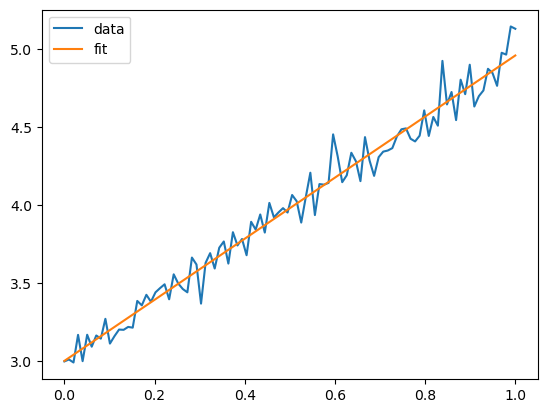

In [12]:
plt.plot(x,y,label="data")
plt.plot(x,intercept+slope*x,label="fit")
plt.legend()
plt.savefig("linear_fit.pdf")